In [5]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import pickle
import clean_data
import random
import train

In [2]:
X_train = pd.read_pickle(os.environ['GP_HIST_PATH'] + '/cleaned/x_train1.pkl')
y_train = pd.read_pickle(os.environ['GP_HIST_PATH'] + '/cleaned/y_train1.pkl')

X_train_10839 = X_train[X_train.NORAD_CAT_ID == 10839]
X_train_10839_idx = X_train_10839.index

X_test = pd.read_pickle(os.environ['GP_HIST_PATH'] + '/cleaned/x_test1.pkl')
y_test = pd.read_pickle(os.environ['GP_HIST_PATH'] + '/cleaned/y_test1.pkl')

X_test_27944 = X_test[X_test.NORAD_CAT_ID == 27944]
X_test_27944_idx = X_test_27944.index

Loading existing model


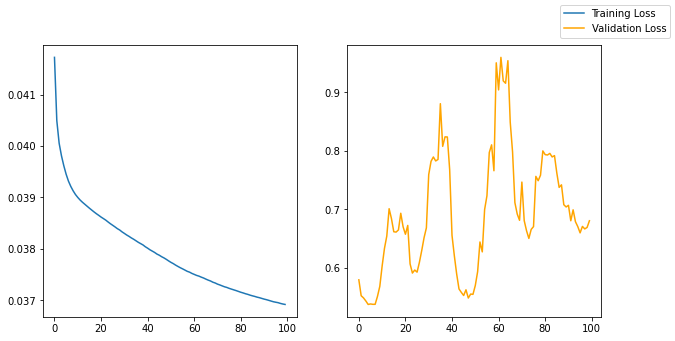

In [10]:
import train

# configurations = {
#     'model_identifier' : "full_local_1",
#     'model_path' : './data',
#     'device' : 'cuda',
#     'random_seed' : 0,
#     'lr' : 0.01,
#     'momentum' : 0.9,
#     'weight_decay' : 1e-6,
#     'max_epochs' : 5,
#     'do_validate' : True,
#     'model_definition' : {
#         'layer1' : 50, 'relu1' : True, #'drop1' : 0.2,
#         'layer2' : 30, 'relu2' : True, #'drop2' : 0.2,
#         'layer3' : 30, 'relu3' : True, #'drop3' : 0.2,
#         'layer4' : 30, 'relu4' : True, #'drop4' : 0.5,
#         'layer5' : 20, 'relu5' : True, #'drop5' : 0.5,
#         'layer6' : 20, 'relu6' : True, #'drop6' : 0.5,
#         'layer7' : 20, 'relu7' : True, #'drop7' : 0.5,
#         'layer8' : 10, 'relu8' : True, #'drop8' : 0.5,
#         'layer9' : 10, 'relu9' : True, #'drop9' : 0.5,
#     },
#     'train_params' : {
#         'batch_size': 2000,
#         'shuffle': True,
#         'num_workers': 5,
#         'pin_memory': True,
#     },
#     'test_params' : {
#         'batch_size': 20000,
#         'num_workers': 5,
#         'pin_memory': True,
#     },
# }

# configurations = {
#     'model_identifier' : "full_local_2",
#     'model_path' : './data',
#     'device' : 'cuda',
#     'random_seed' : 0,
#     'lr' : 0.1,
#     'momentum' : 0.9,
#     'weight_decay' : 1e-6,
#     'max_epochs' : 100,
#     'do_validate' : True,
#     'model_definition' : {
#         'layer1' : 300, 'relu1' : True, #'drop1' : 0.2,
#     },
#     'train_params' : {
#         'batch_size': 2000,
#         'shuffle': True,
#         'num_workers': 5,
#         'pin_memory': True,
#     },
#     'test_params' : {
#         'batch_size': 20000,
#         'num_workers': 5,
#         'pin_memory': True,
#     },
# }

configurations = {
    'model_identifier' : "full_local_3",
    'model_path' : './data',
    'device' : 'cuda',
    'random_seed' : 0,
    'lr' : 0.1,
    'momentum' : 0.9,
    'weight_decay' : 1e-6,
    'max_epochs' : 100,
    'do_validate' : True,
    'model_definition' : {
        'layer1' : 100, 'relu1' : True, #'drop1' : 0.2,
        'layer2' : 100, 'relu2' : True, #'drop2' : 0.2,
        'layer3' : 100, 'relu3' : True, #'drop3' : 0.2,
    },
    'train_params' : {
        'batch_size': 2000,
        'shuffle': True,
        'num_workers': 5,
        'pin_memory': True,
    },
    'test_params' : {
        'batch_size': 20000,
        'num_workers': 5,
        'pin_memory': True,
    },
}

model, _, _, mean_losses, _ = train.load_model_with_config(configurations)
    
tl, vl = zip(*mean_losses)

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.plot(tl, label="Training Loss")
ax2.plot(vl, label="Validation Loss", color='orange')

fig.legend()
plt.show()

Loading existing model
Loading existing model
Loading existing model


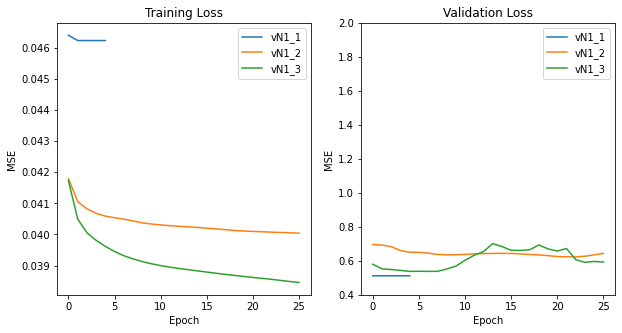

In [10]:
# Comparison of models

configurations = {
    'model_identifier' : "full_local_3",
    'model_path' : './data',
    'device' : 'cuda',
    'random_seed' : 0,
    'lr' : 0.1,
    'momentum' : 0.9,
    'weight_decay' : 1e-6,
    'max_epochs' : 100,
    'do_validate' : True,
    'model_definition' : {
        'layer1' : 100, 'relu1' : True, #'drop1' : 0.2,
        'layer2' : 100, 'relu2' : True, #'drop2' : 0.2,
        'layer3' : 100, 'relu3' : True, #'drop3' : 0.2,
    },
    'train_params' : {
        'batch_size': 2000,
        'shuffle': True,
        'num_workers': 5,
        'pin_memory': True,
    },
    'test_params' : {
        'batch_size': 20000,
        'num_workers': 5,
        'pin_memory': True,
    },
}

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.set_title("Training Loss")
ax2.set_title("Validation Loss")

models = ['full_local_'+str(i) for i in range(1,4)]

for i,m in enumerate(models):
    model_id = m
    configurations['model_identifier'] = model_id

    model, _, _, mean_losses, _ = train.load_model_with_config(configurations)

    tl, vl = zip(*mean_losses)
    name='vN1_'+str(i+1)
    ax1.plot(tl[:26], label=name)
    ax2.plot(vl[:26], label=name)
    
# ax1.set_ylim(0.0125,0.05)
ax2.set_ylim(0.4,2)
# ax1.set_xlim(0,10)
# ax1.set_yscale('log')

ax1.set_xlabel('Epoch')
ax1.set_ylabel('MSE')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('MSE')
ax1.legend()
ax2.legend()
plt.show()

In [13]:
configurations

{'model_identifier': 'full_local_3',
 'model_path': './data',
 'device': 'cuda',
 'random_seed': 0,
 'lr': 0.1,
 'momentum': 0.9,
 'weight_decay': 1e-06,
 'max_epochs': 100,
 'do_validate': True,
 'model_definition': {'layer1': 100,
  'relu1': True,
  'layer2': 100,
  'relu2': True,
  'layer3': 100,
  'relu3': True},
 'train_params': {'batch_size': 2000,
  'shuffle': True,
  'num_workers': 5,
  'pin_memory': True},
 'test_params': {'batch_size': 20000, 'num_workers': 5, 'pin_memory': True}}

In [12]:
_, _, _, mean_losses, _ = train.load_model_with_config(configurations)
mean_losses[:25]

Loading existing model


[(0.041725263545228146, 0.5796813687765623),
 (0.040494642511960395, 0.5525390634166378),
 (0.040054772636741065, 0.5488408799302529),
 (0.039810536424168215, 0.5436119098309041),
 (0.03961762567511929, 0.5376505251061867),
 (0.03945213889556878, 0.5384895381328352),
 (0.03931756432803899, 0.5378704378613236),
 (0.039214787803023524, 0.5378915938119795),
 (0.039129360871852016, 0.5514459543633449),
 (0.03905756564836461, 0.5685754237325545),
 (0.03900011328352825, 0.6032509026523386),
 (0.03894961918304146, 0.6333568853507769),
 (0.03890669858107954, 0.6544356626454602),
 (0.038868103261448114, 0.7011282602788811),
 (0.03882929390345608, 0.6843105843754416),
 (0.038790677306665265, 0.6617848182529891),
 (0.03875403891281073, 0.6612081551901161),
 (0.03871758014562557, 0.6649396848010819),
 (0.038683061540792874, 0.6933816504042549),
 (0.03865152366347848, 0.6702536393026531),
 (0.038618178615376725, 0.657540676802304),
 (0.03858887394609475, 0.6725786866473336),
 (0.03855904154349649, 

In [4]:
cols = ['BSTAR', 'INCLINATION', 'RA_OF_ASC_NODE', 'ECCENTRICITY',
       'ARG_OF_PERICENTER', 'MEAN_ANOMALY', 'MEAN_MOTION', 'SUNSPOTS_1D',
       'SUNSPOTS_3D', 'SUNSPOTS_7D', 'AIR_MONTH_AVG_TEMP',
       'WATER_MONTH_AVG_TEMP', 'year', 'month_sin', 'month_cos', 'hour_sin',
       'hour_cos', 'minute_sin', 'minute_cos', 'second_sin', 'second_cos',
       'ms_sin', 'ms_cos', 'year_y', 'month_sin_y', 'month_cos_y',
       'hour_sin_y', 'hour_cos_y', 'minute_sin_y', 'minute_cos_y',
       'second_sin_y', 'second_cos_y', 'ms_sin_y', 'ms_cos_y',
       'epoch_day_diff', 'epoch_sec_diff', 'epoch_ms_diff']
graph_cols = ['INCLINATION','RA_OF_ASC_NODE', 'ECCENTRICITY', 'ARG_OF_PERICENTER', 'MEAN_ANOMALY', 'MEAN_MOTION']

  0%|          | 0/9 [00:00<?, ?it/s]

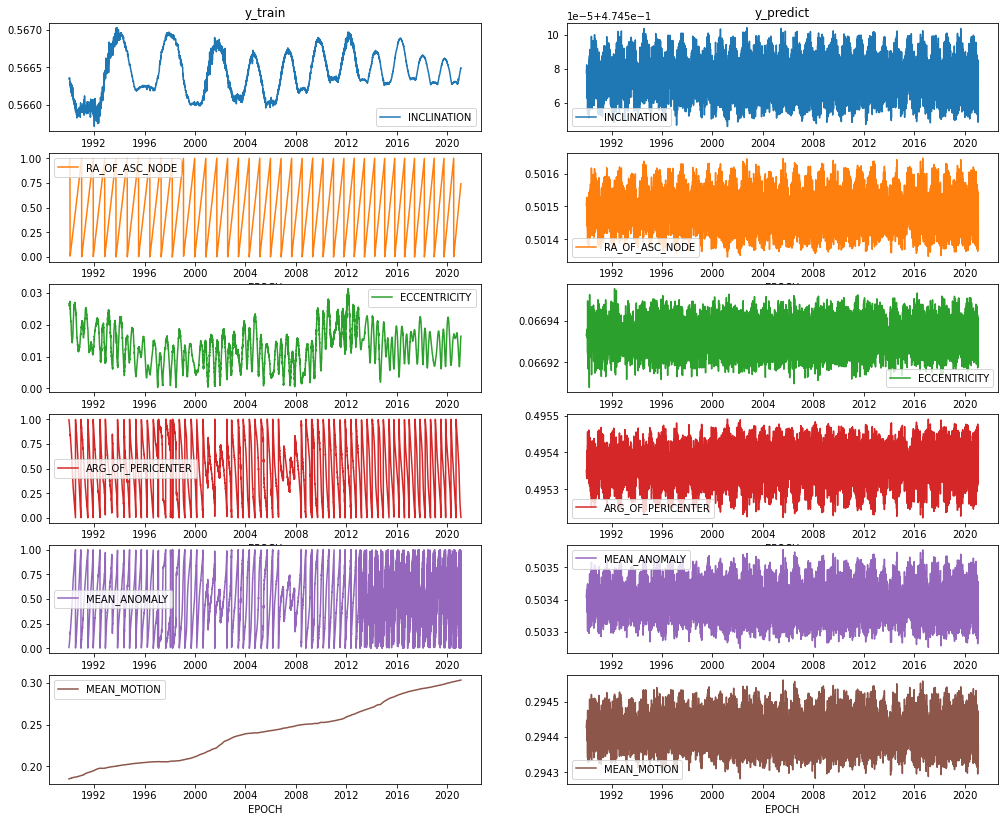

In [15]:
fig, axs = plt.subplots(6,2,figsize=(17,14))

y_train_10839 = y_train.loc[X_train_10839_idx]
y_train_10839['EPOCH'] = X_train_10839['EPOCH_y']
y_train_10839.set_index('EPOCH')[graph_cols].plot(figsize=[14,14], subplots=True, ax=axs[:,0])

results = train.predict(model, X_train_10839[cols], y_train_10839[y_train.columns], device=configurations['device'])
y_pred_10839 = pd.DataFrame(results, columns=graph_cols)
y_pred_10839['EPOCH'] = X_train_10839['EPOCH_y'].reset_index(drop=True)
y_pred_10839.set_index('EPOCH')[graph_cols].plot(figsize=[14,14], subplots=True, ax=axs[:,1])

axs[0,0].set_title('y_train')
axs[0,1].set_title('y_predict')
plt.show()

In [16]:
# X_test_27944.set_index('EPOCH')[graph_cols].plot(figsize=[14,14], subplots=True, title='X_test')
# plt.show()

  0%|          | 0/9 [00:00<?, ?it/s]

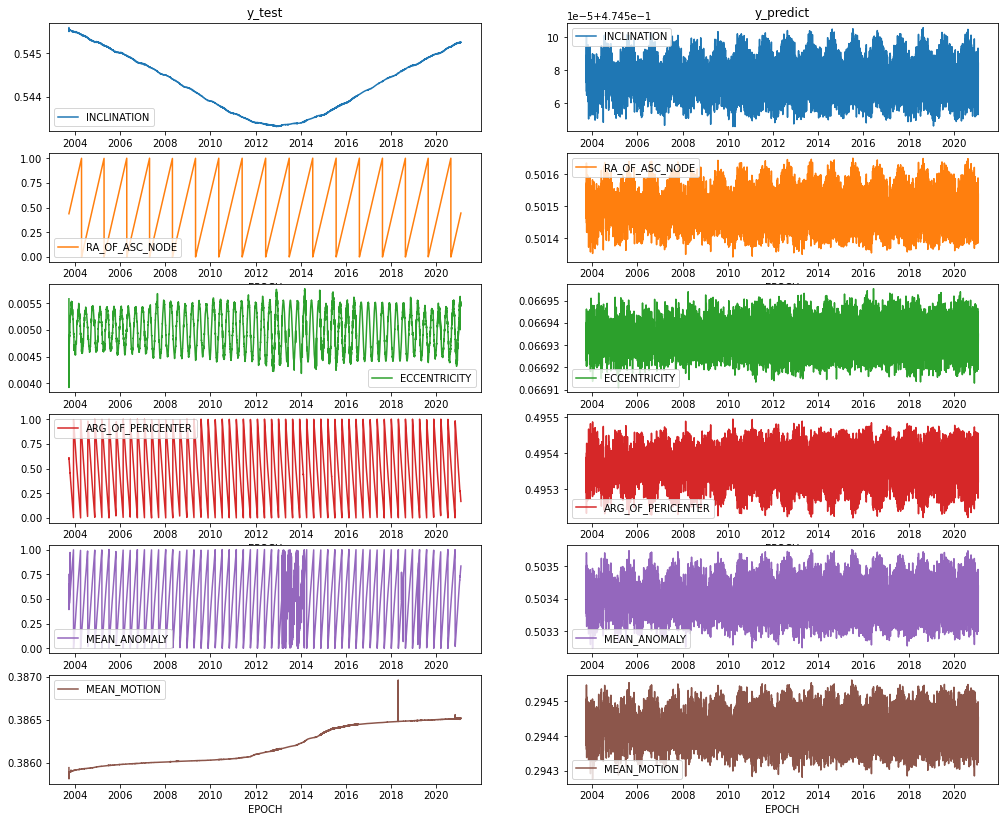

In [19]:
fig, axs = plt.subplots(6,2,figsize=(17,14))

y_test_27944 = y_test.loc[X_test_27944_idx]
y_test_27944['EPOCH'] = X_test_27944['EPOCH_y']
y_test_27944.set_index('EPOCH')[graph_cols].plot(figsize=[14,14], subplots=True, ax=axs[:,0])

results = train.predict(model, X_test_27944[cols], y_test_27944[y_test.columns], device=configurations['device'])
y_pred_27944 = pd.DataFrame(results, columns=graph_cols)
y_pred_27944['EPOCH'] = X_test_27944['EPOCH_y'].reset_index(drop=True)
y_pred_27944.set_index('EPOCH')[graph_cols].plot(figsize=[14,14], subplots=True, ax=axs[:,1])

axs[0,0].set_title('y_test')
axs[0,1].set_title('y_predict')
plt.show()